# Data Analysis on Filipino Family Income and Expenditure

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('./Dataset/Family_Income_and_Expenditure.csv')

In [37]:
df.head(11)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
5,152883,CAR,73326,Wage/Salaries,0,29065,25190,15336,8572,2614,...,0,1,0,0,0,4,0,0,0,1
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,...,0,0,0,0,0,2,0,0,0,1
7,134961,CAR,95644,Other sources of Income,1,37168,28156,14640,15896,3365,...,0,1,0,0,0,2,0,0,0,1
8,171152,CAR,67348,Other sources of Income,0,23117,15845,11464,6685,1370,...,0,0,0,0,0,2,0,0,0,0
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,...,1,0,0,1,0,4,1,0,0,0


### Question 1: What is the average total household income in the Philippines? How does it vary by region, and what are the main sources of income across the country?

In [38]:
df.groupby(['Region']).mean(True).sort_values('Total Household Income', ascending=False)['Total Household Income']

Region
NCR                          420861.861501
IVA - CALABARZON             303360.536040
III - Central Luzon          292965.181650
CAR                          269540.484638
XI - Davao Region            238115.891251
I - Ilocos Region            238110.084327
II - Cagayan Valley          236778.221721
VII - Central Visayas        234909.314050
VI - Western Visayas         220481.260260
IVB - MIMAROPA               216685.124900
X - Northern Mindanao        214057.779544
Caraga                       196907.376543
VIII - Eastern Visayas       196736.581087
IX - Zasmboanga Peninsula    191000.908277
V - Bicol Region             186105.492718
XII - SOCCSKSARGEN           182984.802545
 ARMM                        134746.817616
Name: Total Household Income, dtype: float64

In [39]:
df['Count'] = 1

df.groupby(['Main Source of Income']).count().sort_values('Count', ascending= False)['Count']

Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Count, dtype: int64

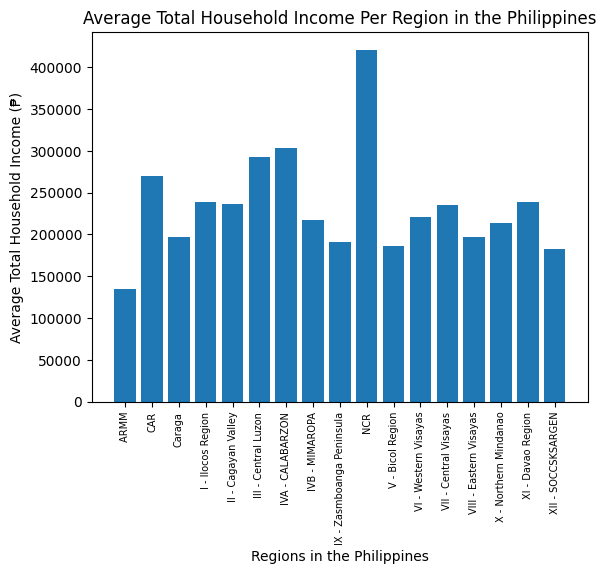

In [40]:
region = [region for region in df.groupby(['Region']).groups.keys()]
income = df.groupby(['Region']).mean(True)['Total Household Income']

plt.bar(region,income)
plt.xticks(rotation='vertical', size=7)
plt.xlabel('Regions in the Philippines')
plt.ylabel('Average Total Household Income (₱)')
plt.title('Average Total Household Income Per Region in the Philippines')
plt.show()

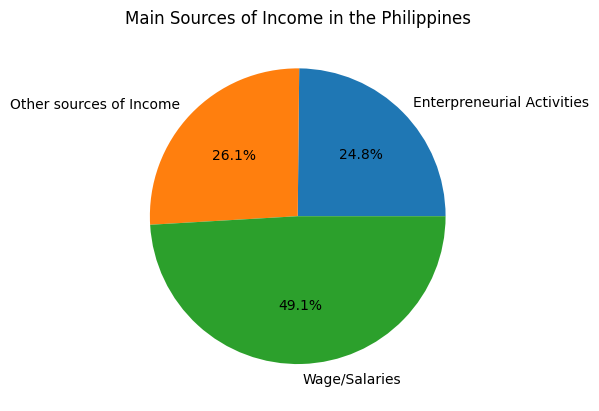

In [45]:
income_source = [source for source in df.groupby(['Main Source of Income']).groups.keys()]
count = df.groupby(['Main Source of Income']).count()['Count']

fig, ax = plt.subplots()
ax.pie(count, labels=income_source, autopct='%1.1f%%')
plt.title('Main Sources of Income in the Philippines')
plt.show()

### Question 2: How much do Filipino households spend on food each month, and which food items are the most commonly purchased? Are there regional differences in food expenditures?

In [49]:
df['Monthly Food Expenditure'] = round(df['Total Food Expenditure'].astype('int') / 12,2)
print(f"Filipino households spends an average of ₱{round(df['Monthly Food Expenditure'].mean(),2)} for food monthly")

Filipino households spends an average of ₱7091.6 for food monthly


In [60]:
df.iloc[:,5:11].sum()

Bread and Cereals Expenditure                  1044155415
Total Rice Expenditure                          755927354
Meat Expenditure                                437876775
Total Fish and  marine products Expenditure     437430001
Fruit Expenditure                               105956933
Vegetables Expenditure                          208007425
dtype: int64

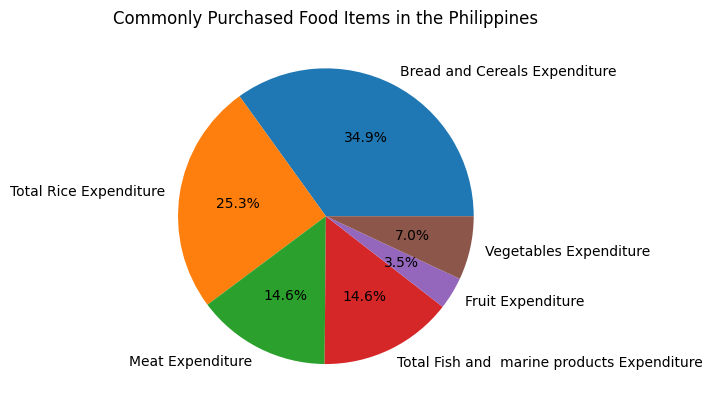

In [56]:
food_items = [item for item in df.columns[5:11]]
count = df.iloc[:,5:11].sum()

fig, ax = plt.subplots()
ax.pie(count, labels=food_items, autopct='%1.1f%%')
plt.title('Commonly Purchased Food Items in the Philippines')
plt.show()

In [93]:
df.groupby(['Region']).sum(True).iloc[:,3:9]

,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure
Region,,,,,,
ARMM,58298237,45203072,5069313,28333757,5822109,11922493
CAR,45999040,36182636,21081212,14415938,5041487,11051803
Caraga,47577408,36298804,14338823,18423375,3805990,7697561
I - Ilocos Region,53358082,40948330,27770780,20641822,5008718,11905919
II - Cagayan Valley,47512180,36754293,27310729,19231536,4189048,12316512
III - Central Luzon,81530967,57768875,50626269,36544311,8675629,18555798
IVA - CALABARZON,102266715,71839824,62805903,44688043,12229486,20678479
IVB - MIMAROPA,31579234,25555382,9891992,11468214,3112330,5714237
IX - Zasmboanga Peninsula,44425171,26905492,10861161,18698907,3740507,8031632


### Question 3: What is the relationship between household income and spending on different categories, such as clothing, housing, education, and transportation? How do these patterns vary by region and by type of household?

### Question 4: How do households in the Philippines allocate their spending on special occasions, such as weddings, birthdays, and holidays? Is there a difference in expenditure based on region or type of household?

### Question 5: How does the demographic profile of household heads (age, education, occupation, marital status, etc.) relate to household income, expenditure patterns, and ownership of assets (such as cars, phones, and appliances)?